In [458]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math



In [460]:
data=pd.read_csv("/content/gdrive/MyDrive/Online /data files/netflix_titles.csv")
data.shape


(7787, 12)

data contains 7787 rows and 12 columns 

In [461]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [462]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [463]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [464]:
data_copy=data.copy()

In [465]:
data_copy

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [466]:
data_copy.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [467]:
data_copy.drop(['director'],axis=1,inplace=True)
data_copy

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


converting the format of the feature date_added.

In [468]:
data_copy['date_added'] = pd.to_datetime(data_copy['date_added'])
#data_copy['year_added'] = pd.DatetimeIndex(data_copy['date_added']).year
data_copy



,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [469]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   cast          7069 non-null   object        
 4   country       7280 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7787 non-null   int64         
 7   rating        7780 non-null   object        
 8   duration      7787 non-null   object        
 9   listed_in     7787 non-null   object        
 10  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 669.3+ KB


In [470]:
data_copy['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [471]:
data_copy['country'].value_counts()

United States                                          2555
India                                                   923
United Kingdom                                          397
Japan                                                   226
South Korea                                             183
                                                       ... 
Germany, Sri Lanka                                        1
United States, Germany, United Kingdom, Australia         1
Brazil, United States                                     1
United States, Brazil, India, Uganda, China               1
Belgium, Ireland, Netherlands, Germany, Afghanistan       1
Name: country, Length: 681, dtype: int64

In [472]:
data_copy['date_added'].value_counts()

2020-01-01    119
2019-11-01     96
2018-03-01     76
2019-12-31     76
2018-10-01     72
             ... 
2018-10-29      1
2017-05-14      1
2018-05-30      1
2016-07-07      1
2011-05-17      1
Name: date_added, Length: 1512, dtype: int64

In [473]:
data_copy.cast.value_counts()

David Attenborough                                                                                                                                                       18
Samuel West                                                                                                                                                              10
Jeff Dunham                                                                                                                                                               7
Craig Sechler                                                                                                                                                             6
Kevin Hart                                                                                                                                                                6
                                                                                                                                            

In [474]:
data_copy['rating'].replace(np.NaN,'TV-MA',inplace=True)
data_copy['cast'].replace(np.NaN,'not specified',inplace=True)
data_copy['country'].replace(np.NaN,'United States',inplace=True)
data_copy['cast'].replace(np.NaN,"not specified",inplace=True)


In [475]:
data_copy.isnull().sum()

show_id          0
type             0
title            0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [476]:
data_copy.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Analysising the content of the data based on ratings given by Coustomers in the Netflix platform**



In [477]:
grp_rating=data_copy.groupby(['rating']).size()
grp_rating

rating
G             39
NC-17          3
NR            84
PG           247
PG-13        386
R            665
TV-14       1931
TV-G         194
TV-MA       2870
TV-PG        806
TV-Y         280
TV-Y7        271
TV-Y7-FV       6
UR             5
dtype: int64

In [478]:
grp_rating_data=grp_rating.reset_index(name="counts")
grp_rating_data

,rating,counts
0,G,39
1,NC-17,3
2,NR,84
3,PG,247
4,PG-13,386
5,R,665
6,TV-14,1931
7,TV-G,194
8,TV-MA,2870
9,TV-PG,806


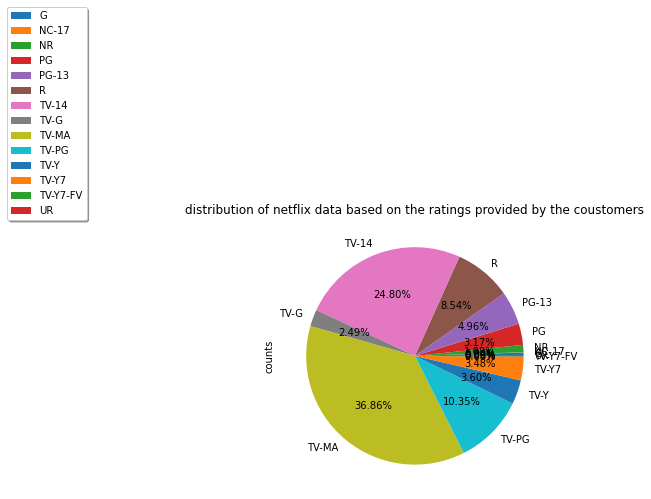

In [479]:
grp_rating_data.plot.pie(y="counts",figsize=(10,5),autopct='%1.2f%%',labels=grp_rating_data["rating"])
plt.title("distribution of netflix data based on the ratings provided by the coustomers")
plt.legend(loc=(-1,1),shadow=True)
plt.show()

**Type of Shows in Netflix Platform**

In [480]:
type_of_shows=data['type'].value_counts()
print(type_of_shows)

Movie      5377
TV Show    2410
Name: type, dtype: int64


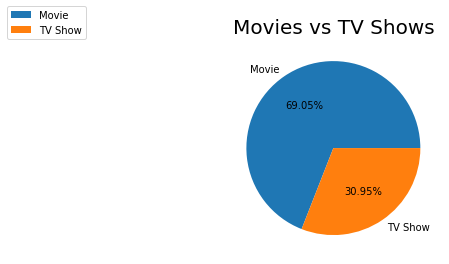

In [481]:
plt.pie(type_of_shows.values, labels = type_of_shows.index,autopct='%1.2f%%')
plt.title("Movies vs TV Shows", size = 20)
labels = ["Movie", "TV Show"]
plt.legend(labels, loc=(-1,1))
plt.show()

**type of rating for tv shows and movies**

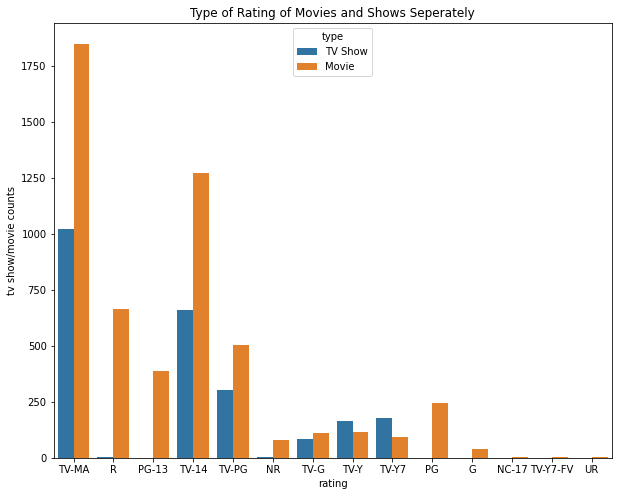

In [482]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=data_copy)
plt.title('Type of Rating of Movies and Shows Seperately')
plt.xlabel("rating")
plt.ylabel("tv show/movie counts")
plt.show()

**country which produced more no.of.titles**

In [483]:
more_no_of_titles = data_copy.groupby('country').count().sort_values("title",ascending=False).head()
more_no_of_titles.reset_index(inplace=True)
more_no_of_titles.head()

,country,show_id,type,title,cast,date_added,release_year,rating,duration,listed_in,description
0,United States,3062,3062,3062,3062,3055,3062,3062,3062,3062,3062
1,India,923,923,923,923,923,923,923,923,923,923
2,United Kingdom,397,397,397,397,396,397,397,397,397,397
3,Japan,226,226,226,226,225,226,226,226,226,226
4,South Korea,183,183,183,183,183,183,183,183,183,183


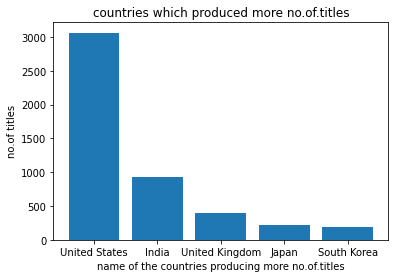

In [484]:
plt.bar(more_no_of_titles.country	,more_no_of_titles.title)
plt.xlabel("name of the countries producing more no.of.titles")
plt.ylabel("no.of titles")
plt.title("countries which produced more no.of.titles")
plt.show()

In [485]:
data_copy['year_added'] = data_copy['date_added'].dt.year


In [486]:
movie_per_year=[]
tv_shows_per_year=[]
for i in range(2008,2020):
    h=data_copy.loc[(data_copy['type']=='Movie') & (data_copy.year_added==i)] 
    g=data_copy.loc[(data_copy['type']=='TV Show') & (data_copy.year_added==i)] 
    movie_per_year.append(len(h))
    tv_shows_per_year.append(len(g))

In [491]:
yearly_data={"movie_per_year":movie_per_year,"tv_show_per_year":tv_shows_per_year}
df=pd.DataFrame(yearly_data,index=np.arange(2008,2020))
df


,movie_per_year,tv_show_per_year
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0
2013,6,5
2014,19,6
2015,58,30
2016,258,185
2017,864,361


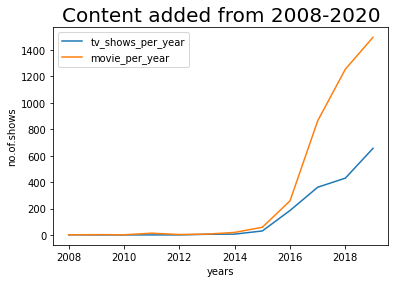

In [493]:
plt.plot(np.arange(2008,2020),tv_shows_per_year)
plt.plot(np.arange(2008,2020),movie_per_year)
plt.title('Content added from 2008-2020', size = 20)
plt.xlabel('years')
plt.ylabel('no.of.shows')
plt.legend(["tv_shows_per_year",'movie_per_year'])
plt.show()

##**OBSERVATIONS:**


*      Most of the content in netflix is categorized as
TV-MA(36.80%),followed by tv14(24.80%).
TV-MA. This program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17. Contains content that is unsuitable for children.
*   Types of shows in Netflix platform is of two types, which are of Tv shows and Movies,where Movies constitute almost 69% and Tv shows constitutes 31%.
*   Most of the movies in netflix are rated as TV-MA,TV-14,R,PG-13,TV-PG.
*   Most of the Tv shows are also rated as TV-MA,TV-14,TV-PG.
*   More no.of.titles are produced by United Nations,India followed by United Kingdom



